In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [3]:
#Write code to load the dataset here
df = pd.read_csv("D:/Prashant/Upgrad/Notebooks/Uber+Request+Data.csv", index_col=0, parse_dates=True)
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
Request id,,,,,
619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
#use the following few lines to explore the data or clean it
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6745 entries, 619 to 6753
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pickup point       6745 non-null   object 
 1   Driver id          4095 non-null   float64
 2   Status             6745 non-null   object 
 3   Request timestamp  6745 non-null   object 
 4   Drop timestamp     2831 non-null   object 
dtypes: float64(1), object(4)
memory usage: 316.2+ KB


In [6]:
df[df['Driver id'].isnull()].head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
Request id,,,,,
1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN


In [7]:
df[df['Drop timestamp'].isnull()].head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
Request id,,,,,
2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN


## Q1. Null Values
Which columns have null values and how many?

a) Request id - 2650 Driver id -3914

b) Request id-   3914 Driver id - 2650

c) Driver id - 2650 Drop time stamp -3914

d) There are no null values in the dataset.

In [4]:
#Write your code here

In [5]:
df.isnull().sum()

Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

## Q2. Choose Correct

Select the correct statements from the options given below. (More than one may be correct)

a) We need to delete the records containing the null values as they won’t be useful for our analysis.

b) Only the records containing null values in the Driver id need to be eliminated.

c) There are a total of 1264 requests which have a status of “cancelled”

d) We need to keep the records containing null values for both the columns and using them analyse the problems faced by Uber.

In [5]:
#write your code here

In [8]:
df.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

## Q3. Busy Hour

Now that you have understood the significance of the null values in this case study, the next step would involve fixing the Request Time-Stamp and Drop-Time Stamp columns. Go ahead and convert it into a date-time object. After that report back the hour in which the most number of requests are being made.

a) 18:00-19:00
b) 16:00-17:00
c) 14:00-15:00
d) 13:00-14:00
e) 19:00-20:00

In [6]:
#write your solution here

In [16]:
df['RequestDate'] = pd.to_datetime(df['Request timestamp']).dt.date
df['RequestTime'] = pd.to_datetime(df['Request timestamp']).dt.time
df['RequestHour'] = pd.to_datetime(df['Request timestamp']).dt.hour
df['DropDate'] = pd.to_datetime(df['Drop timestamp']).dt.date
df['DropTime'] = pd.to_datetime(df['Drop timestamp']).dt.time
df['DropHour'] = pd.to_datetime(df['Drop timestamp']).dt.hour
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestDate,RequestTime,DropDate,DropTime,RequestHour
Request id,,,,,,,,,,
619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07,11:51:00,2016-11-07,13:00:00,11
867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07,17:57:00,2016-11-07,18:47:00,17
1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07,09:17:00,2016-12-07,09:58:00,9
2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07,21:08:00,2016-12-07,22:03:00,21
3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8


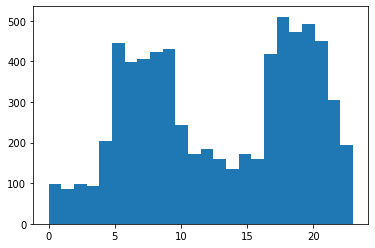

In [17]:
plt.hist(df.RequestHour, bins=24)
plt.show()

In [18]:
df.RequestHour.value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: RequestHour, dtype: int64

## Q4. Cancelled Dates
Next, extract the date from the request timestamp and find the date when the most number of trips were cancelled.

a) 2016-07-13

b) 2016-11-07

c) 2016-07-14

d) 2016-07-15 

e) 2016-12-07

In [7]:
#write your code here

In [19]:
df[df.Status=='Cancelled'].RequestDate.value_counts()

2016-07-13    270
2016-11-07    262
2016-07-14    252
2016-07-15    240
2016-12-07    240
Name: RequestDate, dtype: int64

## Q5. Correct Statements II

Choose the correct statements from the ones given below. (More than one may be correct)

a) In general, the five hour time period in which the most number of trips are completed is approximately 5-10.

b) Across all the days, the number of trips from the City that get cancelled is nearly 9 times less than the trips when there were no cars available.

c) Across all the days, the number of trips from the Airport that get cancelled is comparable to the number of trips when there were no cars available.

d) The number of trips getting completed from City is higher than the trips completed from the airport.

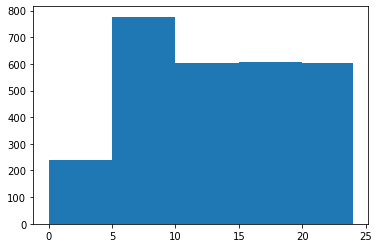

In [22]:
plt.hist(df.DropHour, bins=[0,5,10,15,20,24])
plt.show()

In [23]:
# write your code here
df[df['Pickup point']=='City'].Status.value_counts()

Trip Completed       1504
Cancelled            1066
No Cars Available     937
Name: Status, dtype: int64

In [24]:
df[df['Pickup point']=='Airport'].Status.value_counts()

No Cars Available    1713
Trip Completed       1327
Cancelled             198
Name: Status, dtype: int64

## Q6. Request Time

Once you’ve analysed requests for all the days at an aggregate level, it’s time to find patterns in individual days and see if there is anything common across the days. Analyse the distribution of requests across all the days and choose the correct option.

a) The most number of requests are obtained only in the morning hours across all the days.

b) The most number of requests are obtained only in the evening hours across all the days.

c) The most number of requests are obtained both in the morning as well as the evening hours across all the days.

d) None of these

In [9]:
##Write your code here

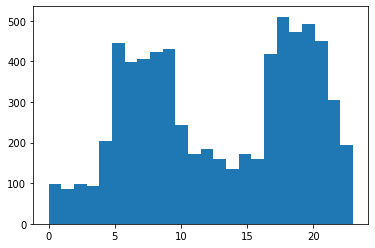

In [25]:
plt.hist(df.RequestHour, bins=24)
plt.show()

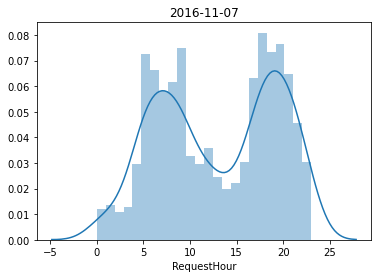

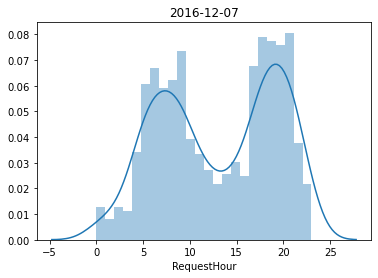

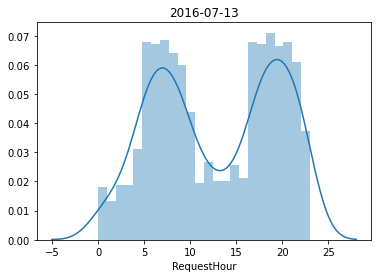

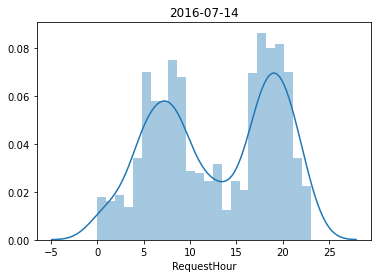

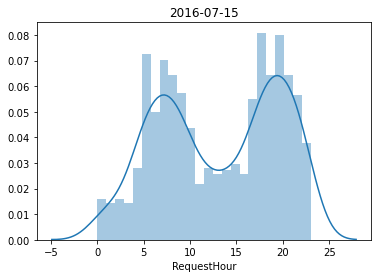

In [26]:
#Solution from Upgrad below

#best way to do this is to plot the histograms for all dates
#we first get the unique dates 
unique_dates=df['RequestDate'].unique()
#and now use a for loop to plot the histogram on 'Request hour'
for i in unique_dates:
    #we will use 24 bins, one bin for each hour
    sns.distplot(df[df["RequestDate"]==i]['RequestHour'], bins=24)
    plt.title(str(i))
    plt.show()

## Q7. Request Time II

Now that you’ve observed that the number of requests across all the days is similar, you need to check it across the pick-up points as well. Analyse the distribution of requests across each of the pick-up points exclusively and choose the correct option:

a) The majority of requests from City are obtained during evening hours.

b) The majority of requests from Airport are obtained during morning hours.

c) The majority of requests from City are obtained during morning hours.

d) Both a) and b)


In [10]:
# Write your code here

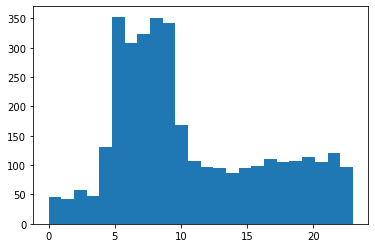

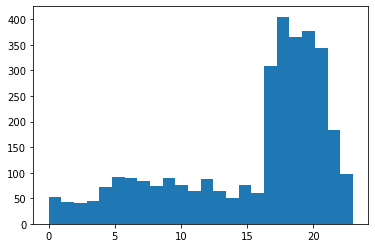

In [27]:
plt.hist(df[df['Pickup point']=='City'].RequestHour, bins=24)
plt.show()

plt.hist(df[df['Pickup point']=='Airport'].RequestHour, bins=24)
plt.show()

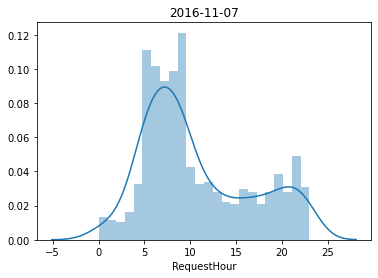

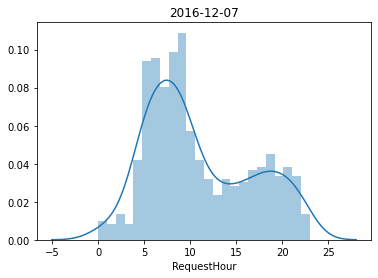

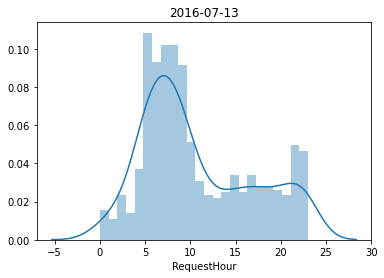

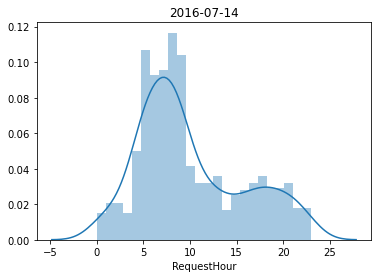

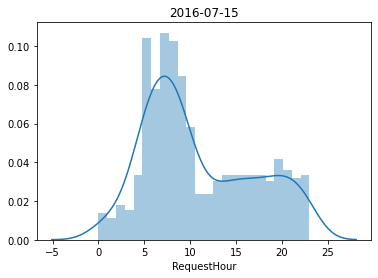

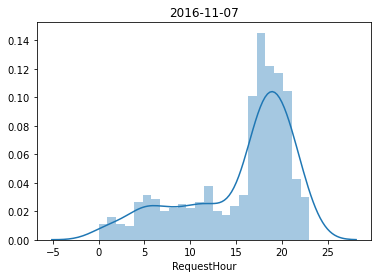

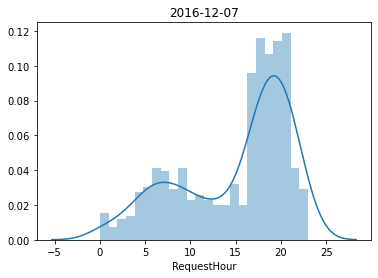

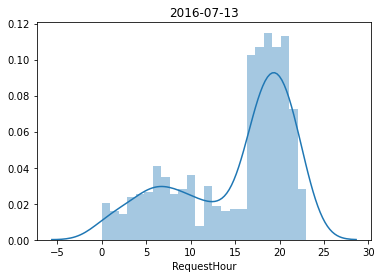

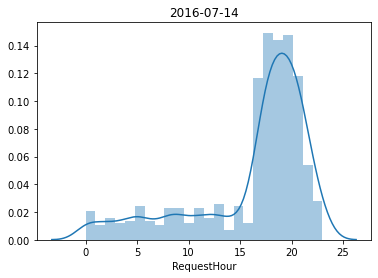

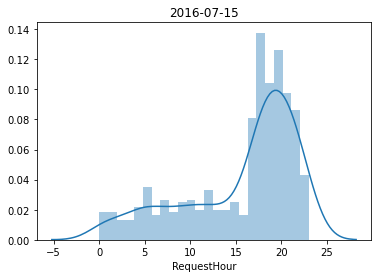

In [28]:
#Solution from Upgrad below

#Continuing from the previous distribution plots, just add a qualifier of 
#Pickup point and plot those distributions again for both City and Airport.
#You’ll observe that the majority of requests obtained from Airport is during the
#evening hours and majority of requests obtained from City is during morning hours.

#For 'City' as the pickup point
for i in unique_dates:
    sns.distplot(df[(df["RequestDate"]==i) & (df['Pickup point']=='City')]['RequestHour'], bins=24)
    plt.title(str(i))
    plt.show()
    
#and for 'Airport' as the pickup point
for i in unique_dates:
    sns.distplot(df[(df["RequestDate"]==i) & (df['Pickup point']=='Airport')]['RequestHour'], bins=24)
    plt.title(str(i))
    plt.show()

## Q8. Request Time III
Now that you have realised the patterns of requests coming from both the city and the airport, the next step is to divide the entire time period to certain slots and then analyse them using plots. Use the following classification table to create the slots and then choose the correct option.


| Hour Range(x) |   Time Slot   |
|:-------------:|:-------------:|
|     x < 5     | Early morning |
|  5 <= x < 10  |    Morning    |
|  10 <= x < 17 |    Day Time   |
|  17 <= x < 22 |    Evening    |
|    22 <= x    |   Late Night  |


a) The maximum number of requests across all the days happens in the Evening.

b) The minimum number of requests across all the days happens in Early Morning.

c) The minimum number of requests across all the days happens in Late Night.

d) Both a) and c)

In [32]:
print('MinHour = ', np.min(df.RequestHour), ' , MaxHour = ', np.max(df.RequestHour))

MinHour =  0  , MaxHour =  23


In [35]:
print([0, 5/24, 10/24, 17/24, 22/24, 1])

[0, 0.20833333333333334, 0.4166666666666667, 0.7083333333333334, 0.9166666666666666, 1]


In [41]:
#write your code here
##Prepare buckets using pd.qcut
df['RequestTimeSlot'] = pd.cut(df.RequestHour, bins=[0, 5, 10, 17, 22, 24], right=False, labels=['Early morning', 'Morning', 'Day Time', 'Evening', 'Late Night'])
df.head(25)

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestDate,RequestTime,DropDate,DropTime,RequestHour,DropHour,RequestTimeSlot,Time slot
Request id,,,,,,,,,,,,,
619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07,11:51:00,2016-11-07,13:00:00,11,13.0,Day Time,Day Time
867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07,17:57:00,2016-11-07,18:47:00,17,18.0,Evening,Evenning
1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07,09:17:00,2016-12-07,09:58:00,9,9.0,Morning,Morning
2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07,21:08:00,2016-12-07,22:03:00,21,22.0,Evening,Evenning
3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,9.0,Morning,Morning
3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13,21:57:28,2016-07-13,22:28:59,21,22.0,Evening,Evenning
4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14,06:15:32,2016-07-14,07:13:15,6,7.0,Morning,Morning
5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15,05:11:52,2016-07-15,06:07:52,5,6.0,Morning,Morning
6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15,17:57:27,2016-07-15,18:50:51,17,18.0,Evening,Evenning


In [42]:
df.RequestTimeSlot.value_counts()

Evening          2342
Morning          2103
Day Time         1224
Early morning     578
Late Night        498
Name: RequestTimeSlot, dtype: int64

In [43]:
#Solution from Upgrad below

#Use a function with an if-else loop containing the classifications mentioned above. 
#Use the Lambda function to apply it on all the values in the Request hour column.
#This gives you the Time Slot for each request. Using a value_counts() on the time slot 
#gives the number of requests made at each time period: highest - Evening(2342), lowest - Late Night(498).

def time_period(x):
    #divide the time of the day into five categories
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

#use this function on the request hour to create Time slot 
df['Time slot'] = df['RequestHour'].apply(lambda x: time_period(x))
#and now simply use value_counts()
df['Time slot'].value_counts()

Evening          2342
Morning          2103
Day Time         1224
Early Morning     578
Late Night        498
Name: Time slot, dtype: int64

## Q9. Bar
After this, you decide to plot a bar plot with the time slots in the X-axis and the number of requests in the Y-axis and observe the Status of trips for each time slot. This way you’ll get the number of trip request across each time slot and their status as well. 

To make things easier, you created an additional column called ‘Count’ whose value is fixed at 1 for all the rows (df["Count"]=1). Then in order to create a bar plot as mentioned in the first statement, you decided to use sns.barplot() function. 

What are the parameters that you need to take here?
a) Take time slots as x and Count as y
b) Take the Status as hue and df as the data
c) Both (a) and (b)
d) The parameters mentioned above are insufficient

In [44]:
#Use this for rough work
df['Count'] = 1

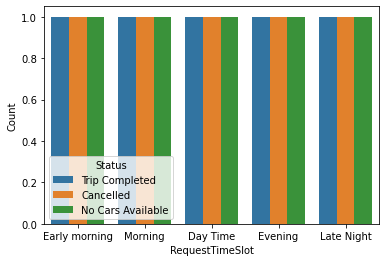

In [49]:
sns.barplot(x='RequestTimeSlot',y='Count',hue='Status',data=df)
plt.show()

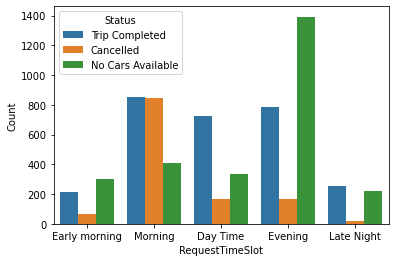

In [45]:
#After adding estimator=np.sum
sns.barplot(x='RequestTimeSlot',y='Count',hue='Status',data=df,estimator=np.sum)
plt.show()

## Q10. Correct Bar
Once you have created the bar plot correctly, what major issues are you able to observe? Choose the correct options amongst the following-

a) A majority of requests in the evening are having a “No cars available” status

b) The major issue in the morning slot is that it has a lot of cancellations

c) Both (a) and (b)

d) None of the above

In [13]:
#use this as rough work

## Q11. Demand Supply
Now that you’ve understood the major issues in the morning and the evening time slots, it’s time to compute the demand and supply gap. Here,

Demand = # of Requests Uber Gets | Supply = # of Requests Uber is able to fulfil | Demand supply gap = Demand - Supply.

Compute the demand-supply gap for both the morning and the evening slots for the Pick-up points having the most number of requests in that time_slot

a) Morning - 1205 Evening - 1427
b) Morning - 1427 Evening - 1205
c) Morning - 1249 Evening - 1558
d) Morning - 1558 Evening - 1249

In [62]:
#write your code here
morningOrEvening = df[df.RequestTimeSlot.isin(['Morning','Evening'])]
morningOrEvening.groupby(['RequestTimeSlot', 'Pickup point'])['Count'].sum()

RequestTimeSlot  Pickup point
Early morning    Airport            NaN
                 City               NaN
Morning          Airport          426.0
                 City            1677.0
Day Time         Airport            NaN
                 City               NaN
Evening          Airport         1800.0
                 City             542.0
Late Night       Airport            NaN
                 City               NaN
Name: Count, dtype: float64

In [63]:
cityMorning = df[(df['Pickup point']=='City') & (df.RequestTimeSlot=='Morning')]
airportEvening = df[(df['Pickup point']=='Airport') & (df.RequestTimeSlot=='Evening')]

In [64]:
cityMorning.groupby(['Status'])['Count'].sum()

Status
Cancelled            820
No Cars Available    385
Trip Completed       472
Name: Count, dtype: int64

In [65]:
airportEvening.groupby(['Status'])['Count'].sum()

Status
Cancelled             106
No Cars Available    1321
Trip Completed        373
Name: Count, dtype: int64

In [72]:
#Solution from Upgrad below

#We create a pivot table with values as 'Count' and aggfunc as np.sum. 
#We create this pivot table for both pickup points 'City' and 'Airport'.
demandsupply_City=pd.pivot_table(df[df['Pickup point']=='City'], values='Count', index='Time slot', columns ='Status', aggfunc=np.sum)
demandsupply_Airport=pd.pivot_table(df[df['Pickup point']=='Airport'], values='Count', index='Time slot', columns ='Status', aggfunc=np.sum)

#After that, we simply add a new column 'Gap' and add values in 'Cancelled' and 'No cars available'
demandsupply_City['Gap'] = demandsupply_City['Cancelled'] + demandsupply_City['No Cars Available']
demandsupply_Airport['Gap'] = demandsupply_Airport['Cancelled'] + demandsupply_Airport['No Cars Available']

#check both the pivot tables and then choose the correct option.
print('City max gap\n', demandsupply_City[demandsupply_City.Gap == demandsupply_City.Gap.max()])
print('Airport max gap\n', demandsupply_Airport[demandsupply_Airport.Gap == demandsupply_Airport.Gap.max()])

City max gap
 Status     Cancelled  No Cars Available  Trip Completed   Gap
Time slot                                                    
Morning          820                385             472  1205
Airport max gap
 Status     Cancelled  No Cars Available  Trip Completed   Gap
Time slot                                                    
Evening          106               1321             373  1427
